<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:250%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;">ABALONE AGE PREDICTION 🐚📊</p>

<div style="background-color:#FFF; border-radius:8px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;border-width: 2px;">
    <img src="https://media.tenor.com/sjjDq0y5F5UAAAAd/ethplode-ethplo.gif" alt="Animated GIF">
</div>

<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:150%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;"> IMPORT DEPENDENCIES</p>

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing   import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    QuantileTransformer,
    PowerTransformer
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import (
    LinearRegression,
    Ridge,
    Lasso
)
from sklearn.tree           import DecisionTreeRegressor
from sklearn.ensemble       import RandomForestRegressor
from sklearn.metrics        import (
    mean_squared_error,
    r2_score,
    mean_squared_log_error
)

from sklearn.pipeline       import Pipeline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/abalone-dataset/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:150%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;">DATA PRE-PROCESSING AND EDA</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
data['Sex'] = data['Sex'].replace({"M":0,"F":1,"I":2}).astype(int)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


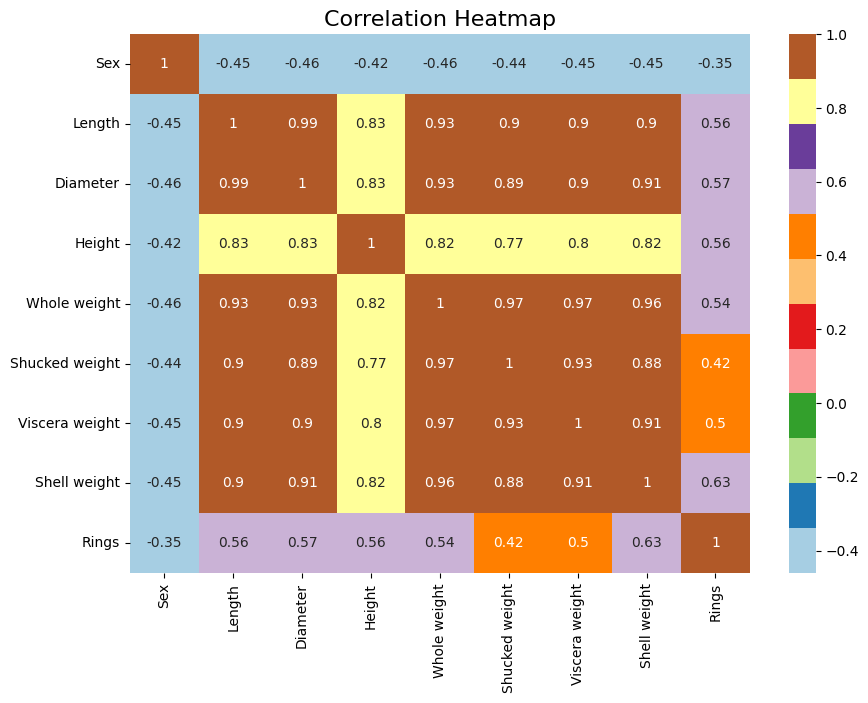

In [7]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="Paired")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Q1: 0.00 | Q2: 1.00 | Q3: 2.00



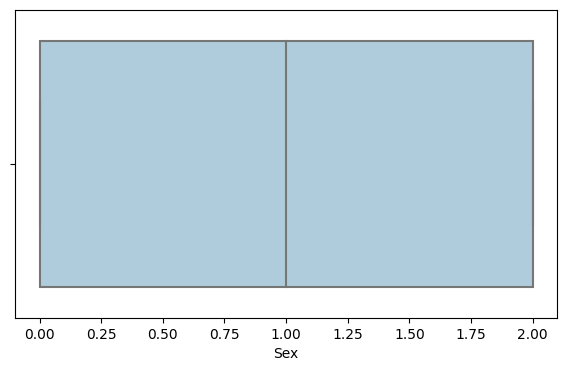

Q1: 0.45 | Q2: 0.55 | Q3: 0.61



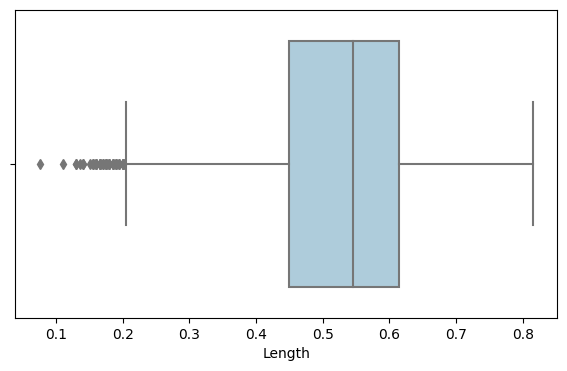

Q1: 0.35 | Q2: 0.42 | Q3: 0.48



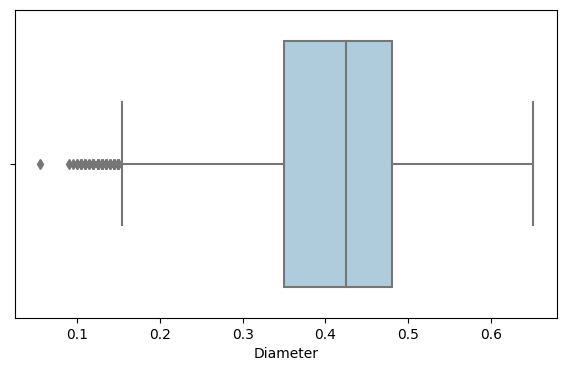

Q1: 0.12 | Q2: 0.14 | Q3: 0.17



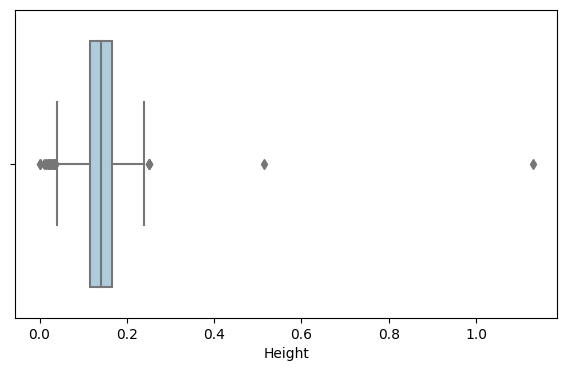

Q1: 0.44 | Q2: 0.80 | Q3: 1.15



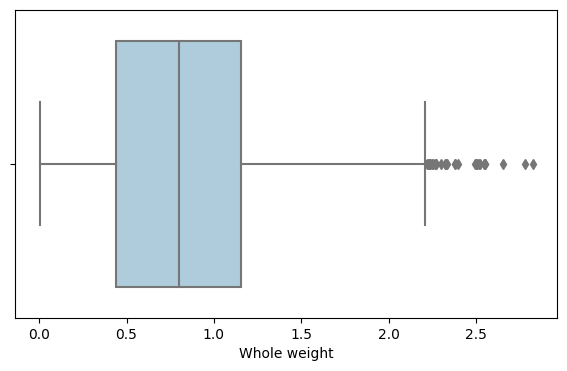

Q1: 0.19 | Q2: 0.34 | Q3: 0.50



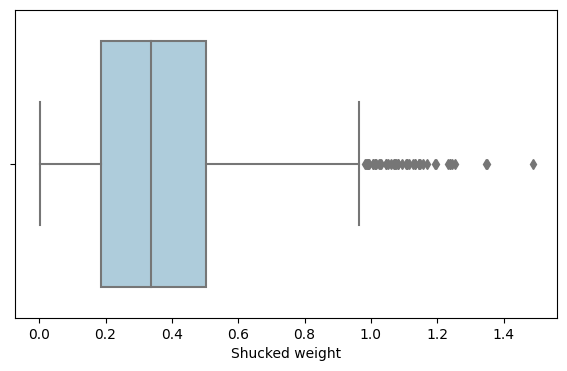

Q1: 0.09 | Q2: 0.17 | Q3: 0.25



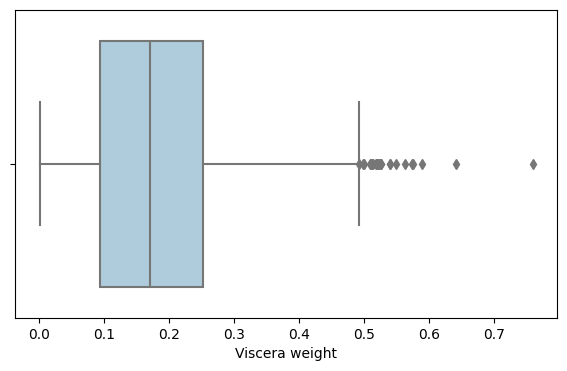

Q1: 0.13 | Q2: 0.23 | Q3: 0.33



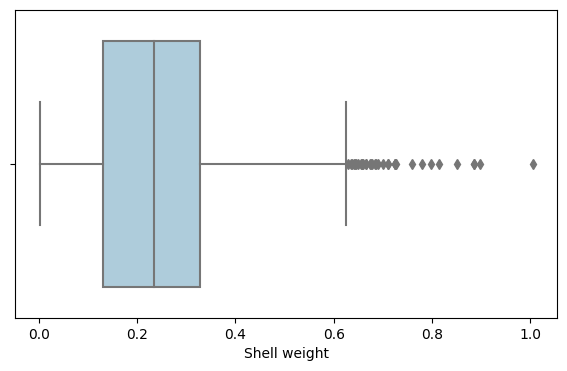

Q1: 8.00 | Q2: 9.00 | Q3: 11.00



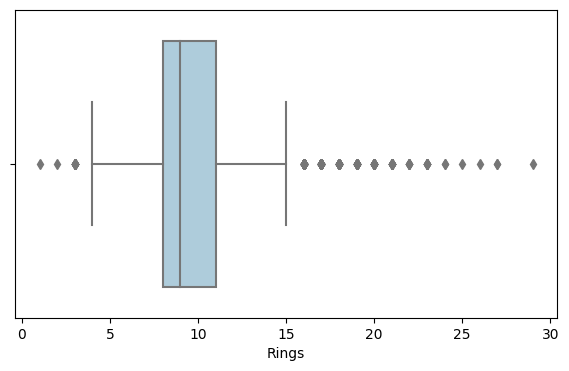

In [8]:
for i in data.columns:
    plt.figure(figsize=(7, 4))
    
    q1 = np.percentile(data[i], 25)
    q2 = np.percentile(data[i], 50)
    q3 = np.percentile(data[i], 75)
    
    print("Q1: {:.2f} | Q2: {:.2f} | Q3: {:.2f}\n".format(q1, q2, q3))
    
    sns.boxplot(x=data[i], palette="Paired", orient='v')
    plt.show()

In [9]:
def outlier_th(dataframe, col_name, q1, q3):
    q1 = dataframe[col_name].quantile(q1)
    q3 = dataframe[col_name].quantile(q3)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    up_limit  = q3 + 1.5 * iqr
    return low_limit, up_limit

for c in data.columns:
    low, up = outlier_th(data, c ,q1=0.25, q3=0.75)
    data = data[~((data[c] < low) | (data[c] > up))]

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Q1: 0.00 | Q2: 1.00 | Q3: 2.00



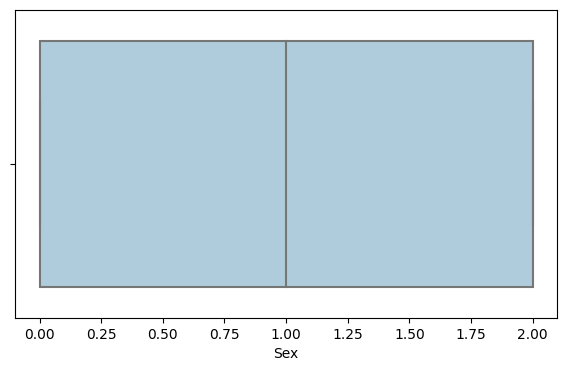

Q1: 0.45 | Q2: 0.54 | Q3: 0.61



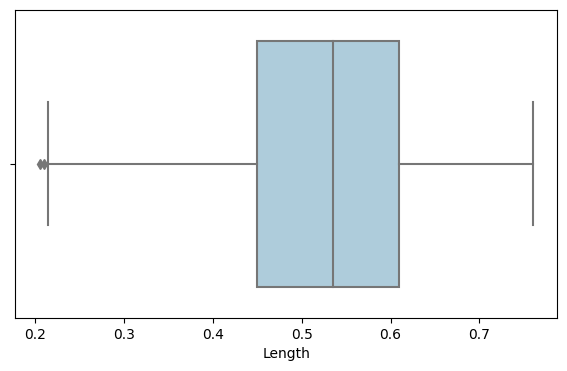

Q1: 0.34 | Q2: 0.42 | Q3: 0.47



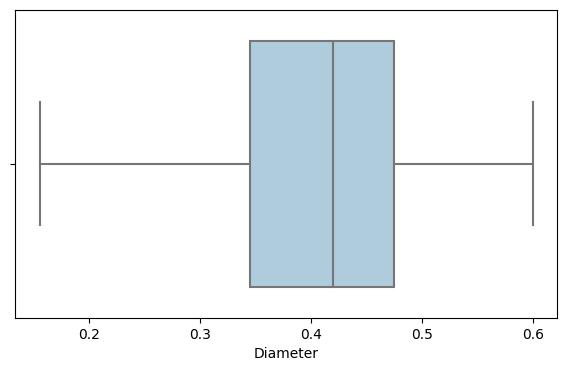

Q1: 0.11 | Q2: 0.14 | Q3: 0.17



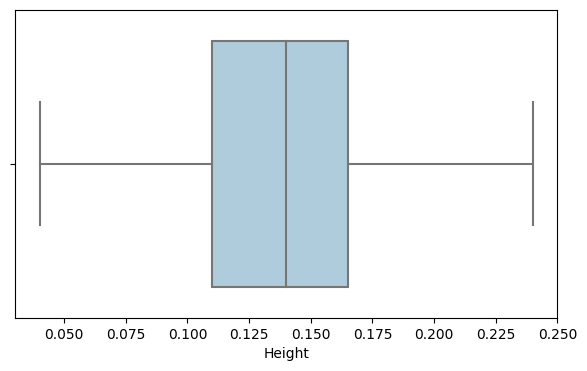

Q1: 0.43 | Q2: 0.77 | Q3: 1.12



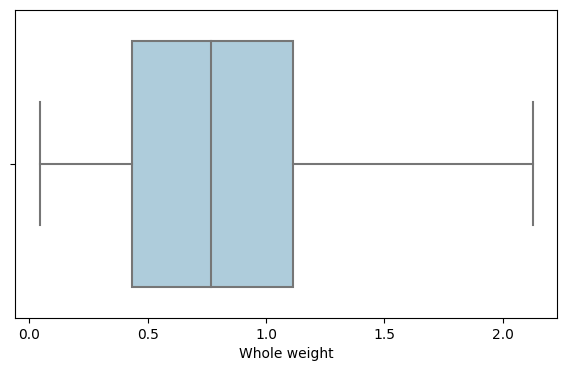

Q1: 0.18 | Q2: 0.33 | Q3: 0.49



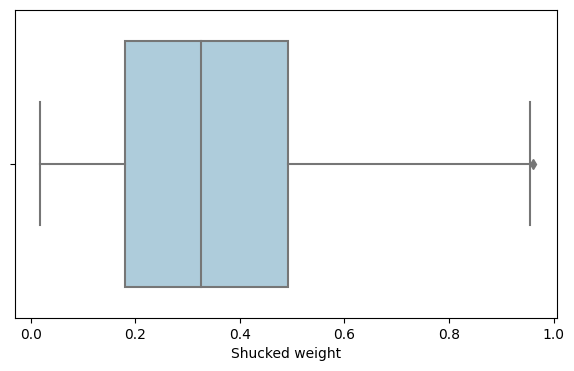

Q1: 0.09 | Q2: 0.16 | Q3: 0.24



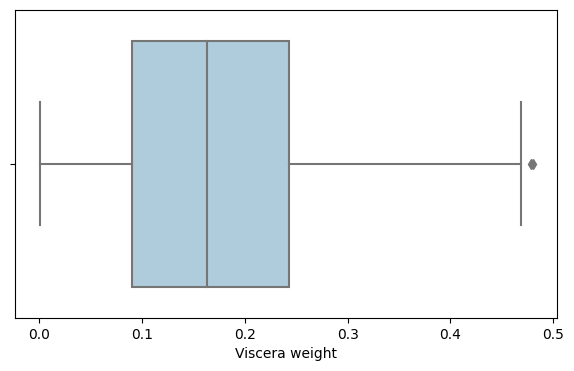

Q1: 0.12 | Q2: 0.22 | Q3: 0.31



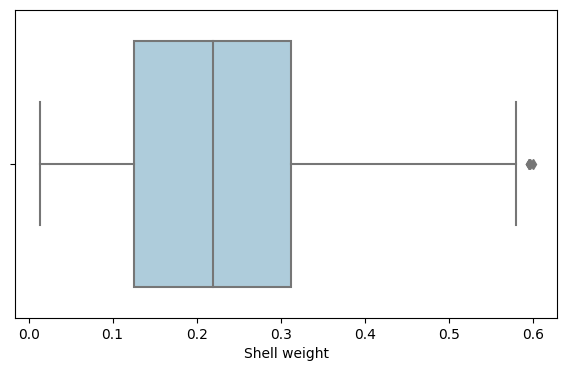

Q1: 8.00 | Q2: 9.00 | Q3: 11.00



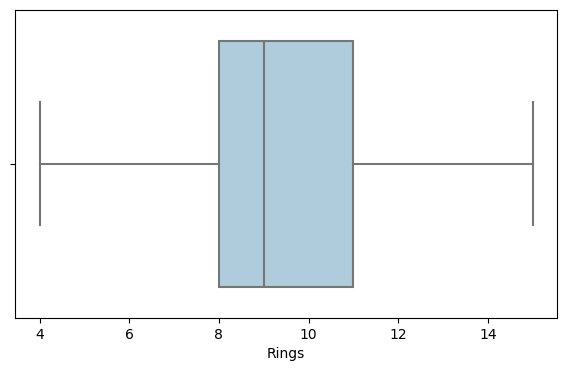

In [10]:
for i in data.columns:
    plt.figure(figsize=(7, 4))
    
    q1 = np.percentile(data[i], 25)
    q2 = np.percentile(data[i], 50)
    q3 = np.percentile(data[i], 75)
    
    print("Q1: {:.2f} | Q2: {:.2f} | Q3: {:.2f}\n".format(q1, q2, q3))
    
    sns.boxplot(x=data[i], palette="Paired", orient='v')
    plt.show()

In [11]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

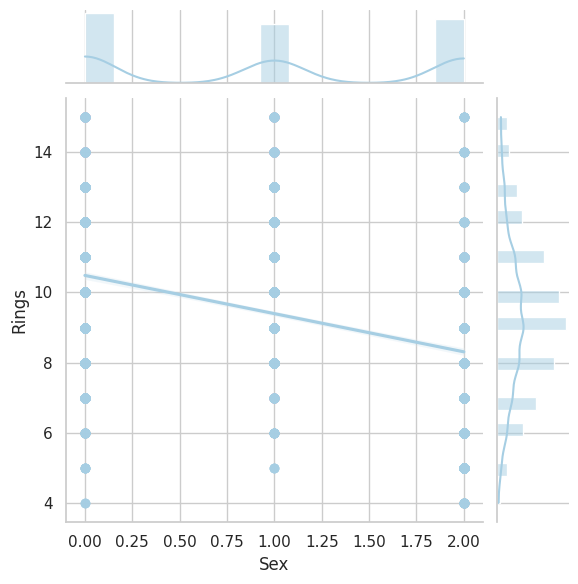

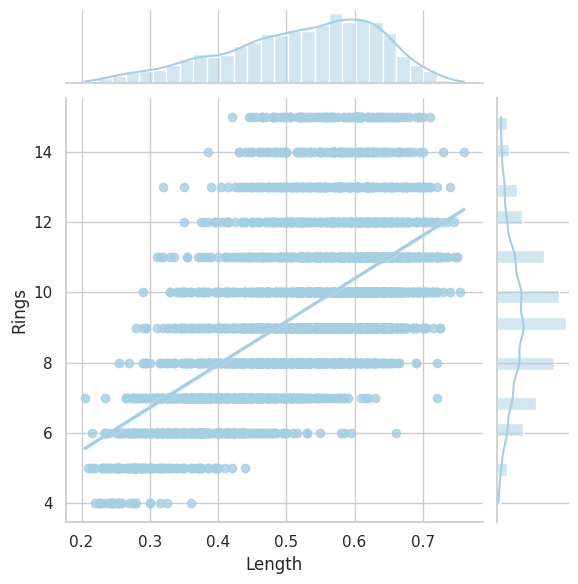

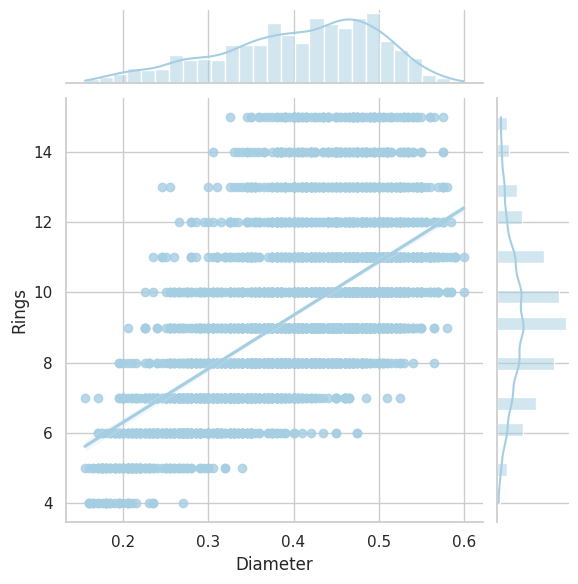

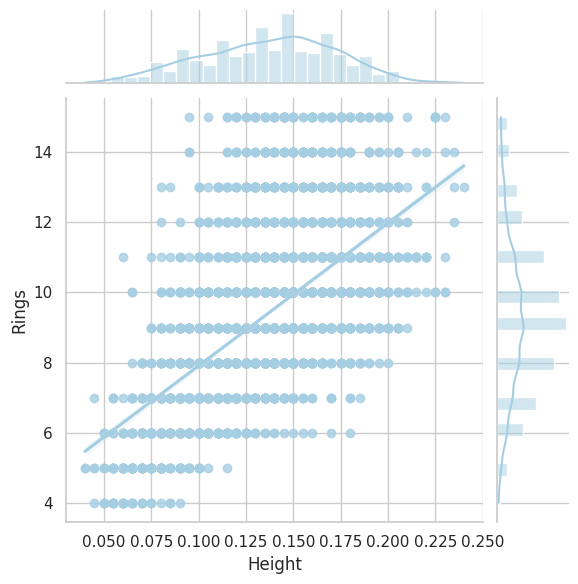

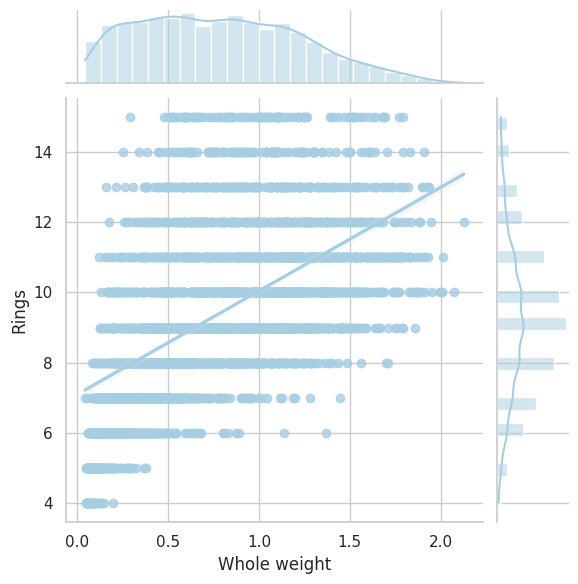

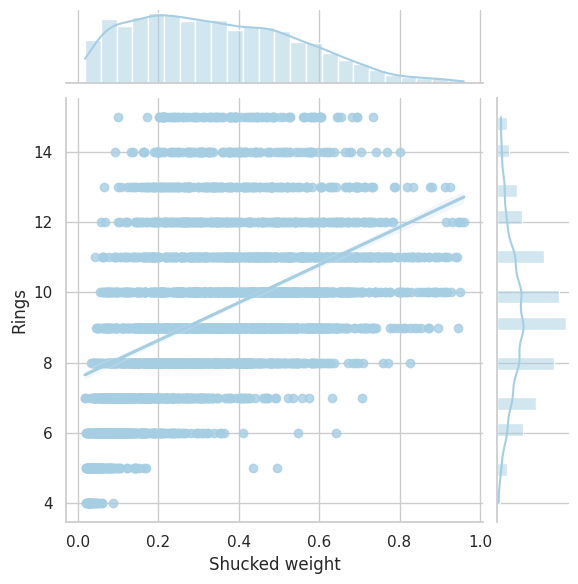

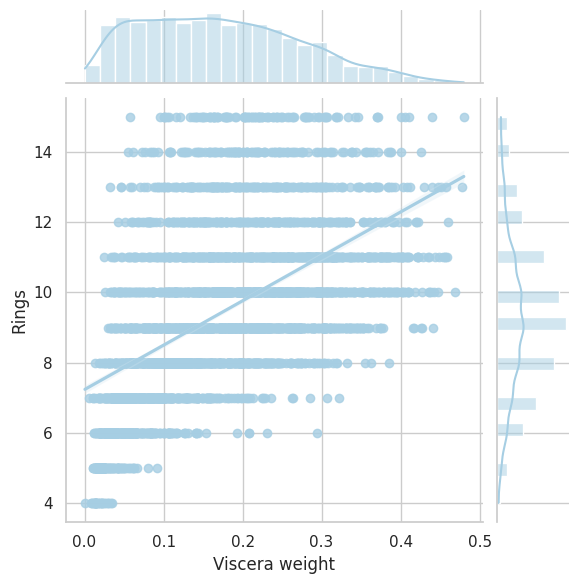

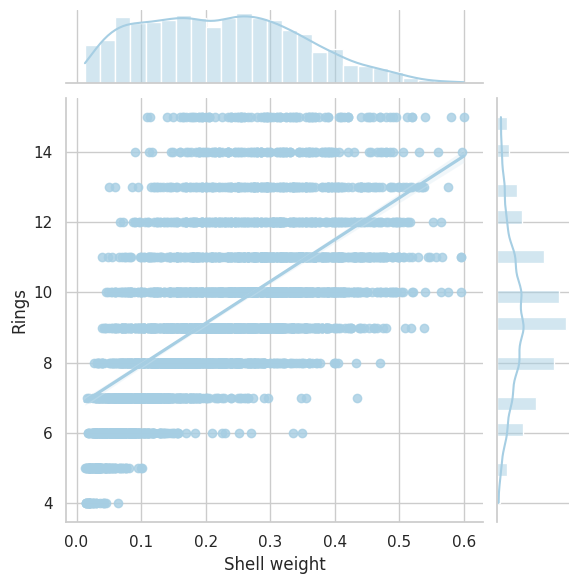

In [12]:
sns.set(style="whitegrid", palette="Paired")
features = [col for col in data.columns if col != "Rings"]
for feature in features:
    sns.jointplot(data=data, x=feature, y="Rings", kind="reg")
plt.show()

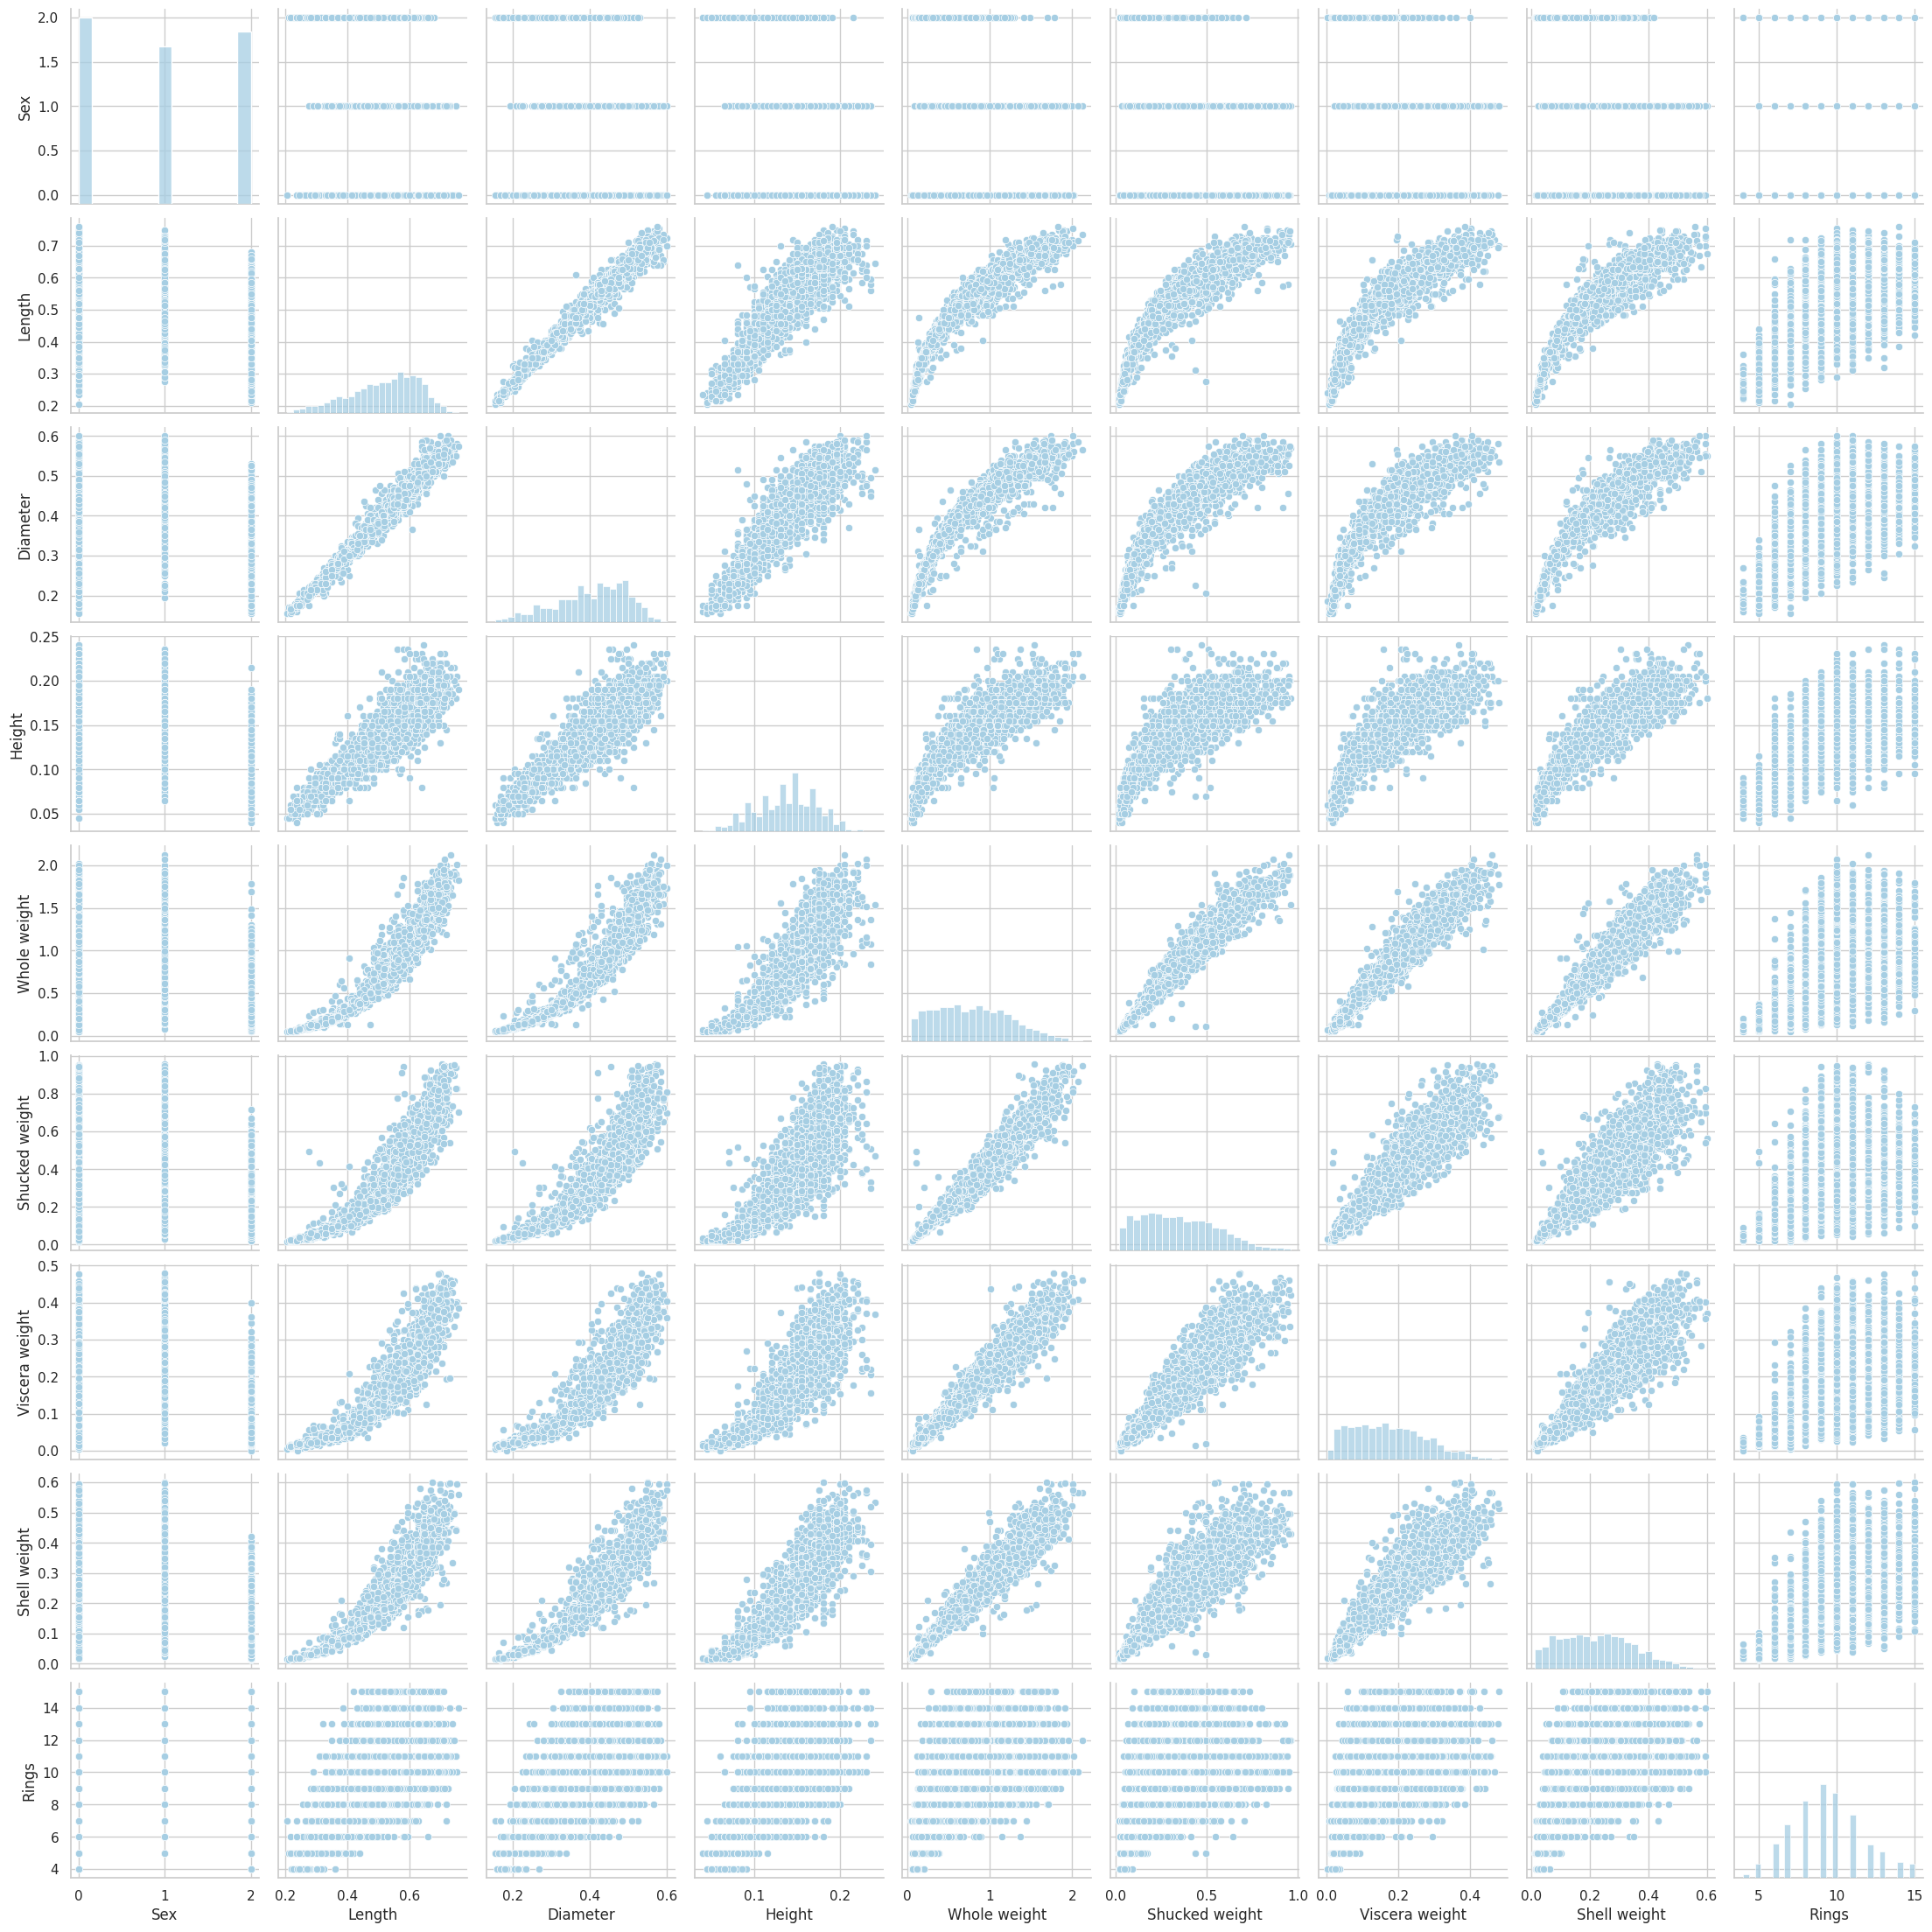

In [13]:
sns.set(style="whitegrid", palette="Paired")
sns.pairplot(data)
plt.show()

<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:150%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;">MODEL ENGINEERING</p>

In [14]:
X = data.drop("Rings", axis = "columns")
Y = data["Rings"]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2829, 8) (944, 8) (2829,) (944,)


In [16]:
regressors = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree Regression", DecisionTreeRegressor()),
    ("Random Forest Regression", RandomForestRegressor())
]

scalers = [
    ("Standard Scaler", StandardScaler()),
    ("MinMax Scaler", MinMaxScaler()),
    ("Robust Scaler", RobustScaler()),
    ("Quantile Transformer", QuantileTransformer()),
    ("Power Transformer", PowerTransformer())
]

results = []

for regressor_name, regressor in regressors:
    for scaler_name, scaler in scalers:
        pipeline = Pipeline([
            ('scaler', scaler),
            ('regressor', regressor)
        ])
        pipeline.fit(X_train, Y_train)
        Y_pred = pipeline.predict(X_test)
        r2     = r2_score(Y_test, Y_pred)
        mse = mean_squared_error(Y_test, Y_pred)
        rmse = np.sqrt(mse)
        results.append({
            'Regressor': regressor_name,
            'Scaler': scaler_name,
            'R2': r2,
            'MSE': mse,
            'RMSE': rmse
        })
        print(f"******** {regressor_name} + {scaler_name} ********")

******** Linear Regression + Standard Scaler ********
******** Linear Regression + MinMax Scaler ********
******** Linear Regression + Robust Scaler ********
******** Linear Regression + Quantile Transformer ********
******** Linear Regression + Power Transformer ********
******** Ridge Regression + Standard Scaler ********
******** Ridge Regression + MinMax Scaler ********
******** Ridge Regression + Robust Scaler ********
******** Ridge Regression + Quantile Transformer ********
******** Ridge Regression + Power Transformer ********
******** Lasso Regression + Standard Scaler ********
******** Lasso Regression + MinMax Scaler ********
******** Lasso Regression + Robust Scaler ********
******** Lasso Regression + Quantile Transformer ********
******** Lasso Regression + Power Transformer ********
******** Decision Tree Regression + Standard Scaler ********
******** Decision Tree Regression + MinMax Scaler ********
******** Decision Tree Regression + Robust Scaler ********
******** Dec

In [17]:
results = pd.DataFrame(results)
results.head()

,Regressor,Scaler,R2,MSE,RMSE
0,Linear Regression,Standard Scaler,0.504548,2.758679,1.660927
1,Linear Regression,MinMax Scaler,0.504548,2.758679,1.660927
2,Linear Regression,Robust Scaler,0.504548,2.758679,1.660927
3,Linear Regression,Quantile Transformer,0.490164,2.838770,1.684865
4,Linear Regression,Power Transformer,0.500315,2.782247,1.668007


==================== Linear Regression ====================
================================= R^2 =======================


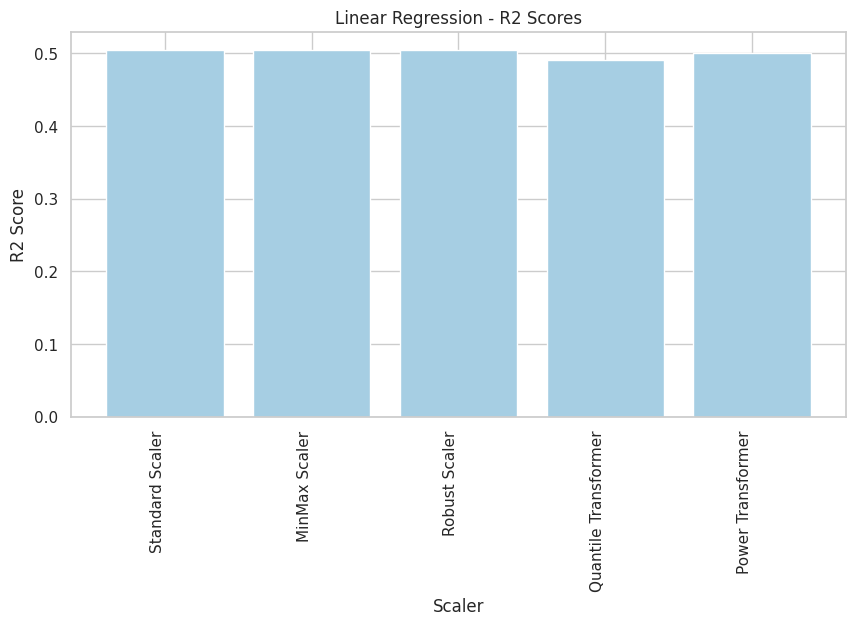

================================= MSE =======================


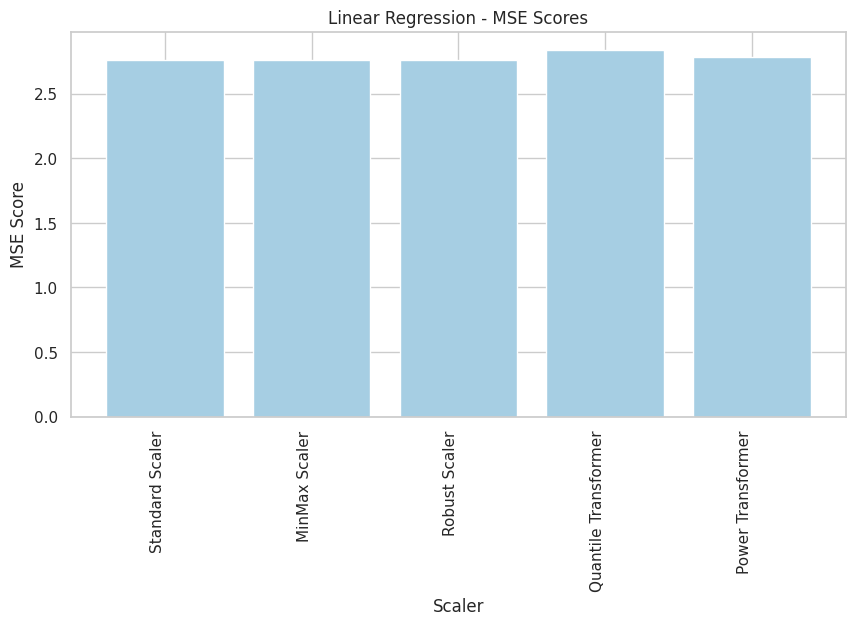

================================= RMSE =====================


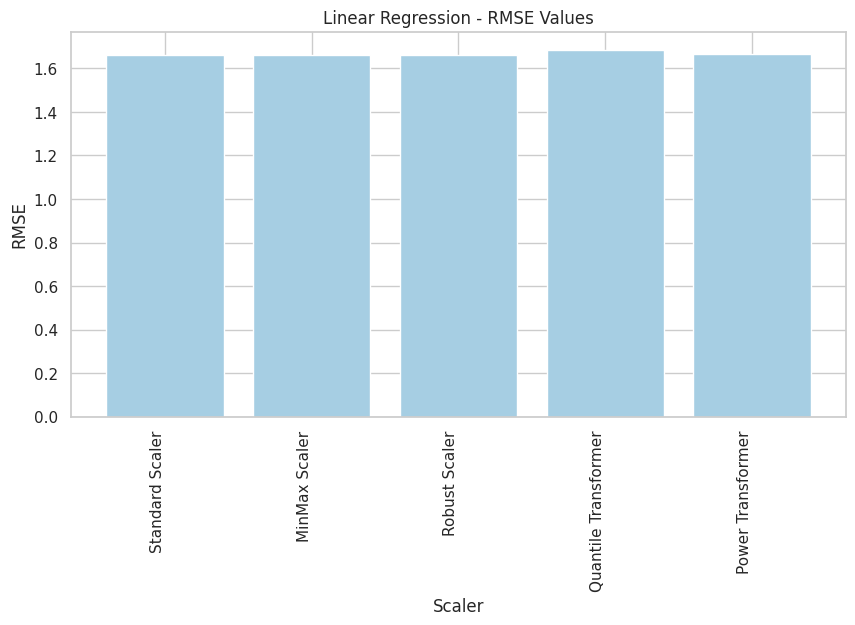

==================== Ridge Regression ====================
================================= R^2 =======================


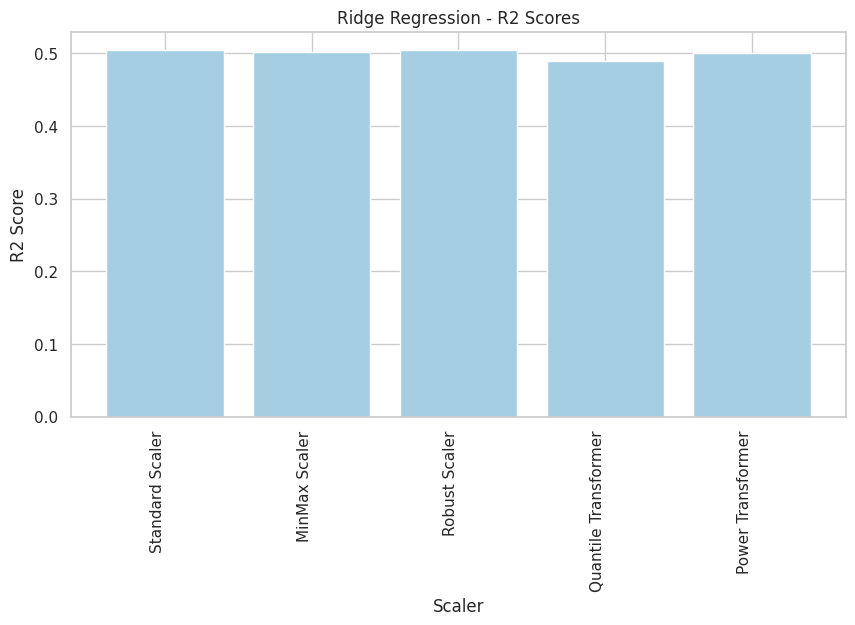

================================= MSE =======================


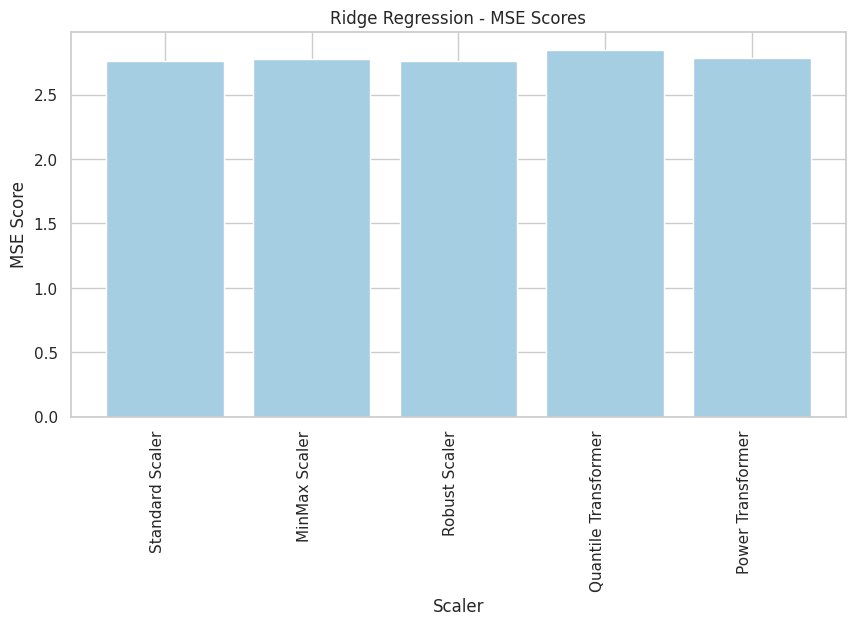

================================= RMSE =====================


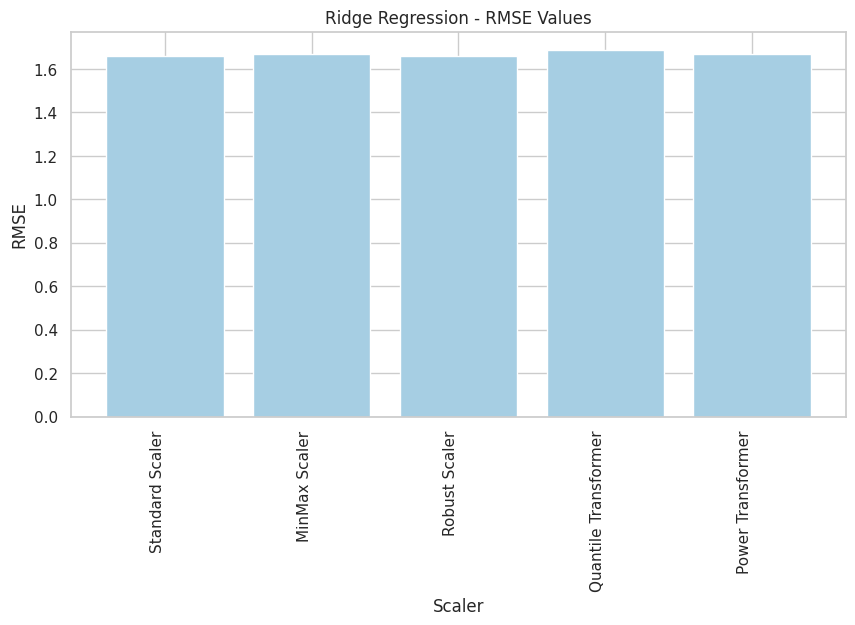

==================== Lasso Regression ====================
================================= R^2 =======================


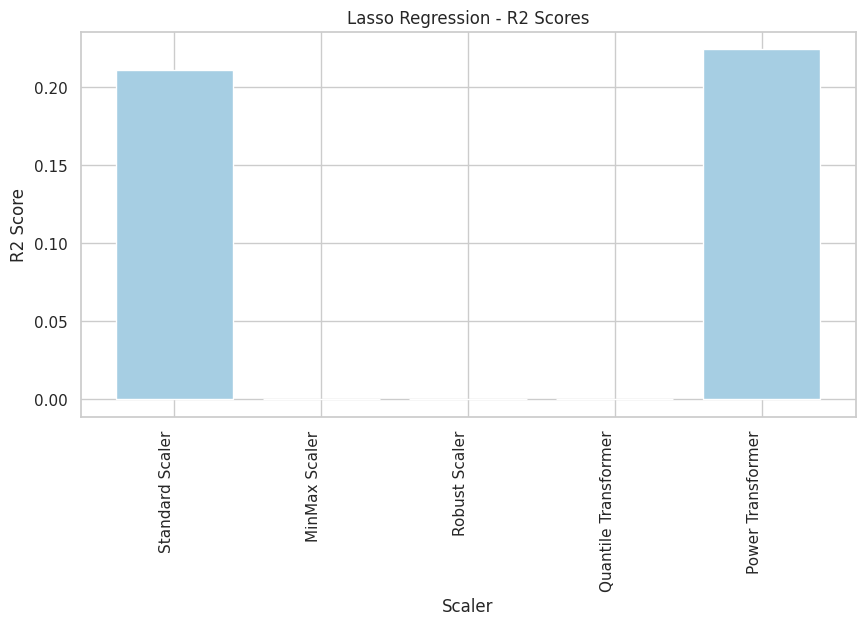

================================= MSE =======================


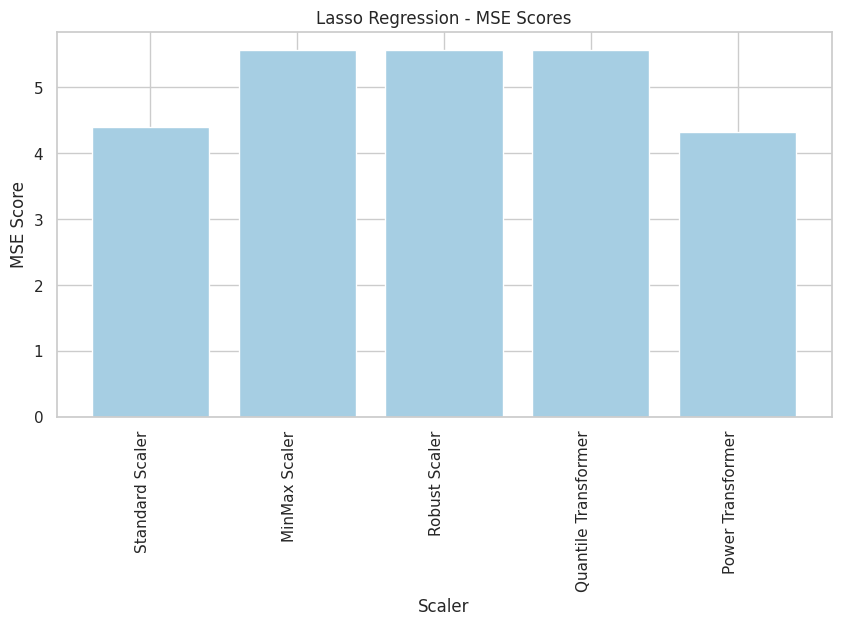

================================= RMSE =====================


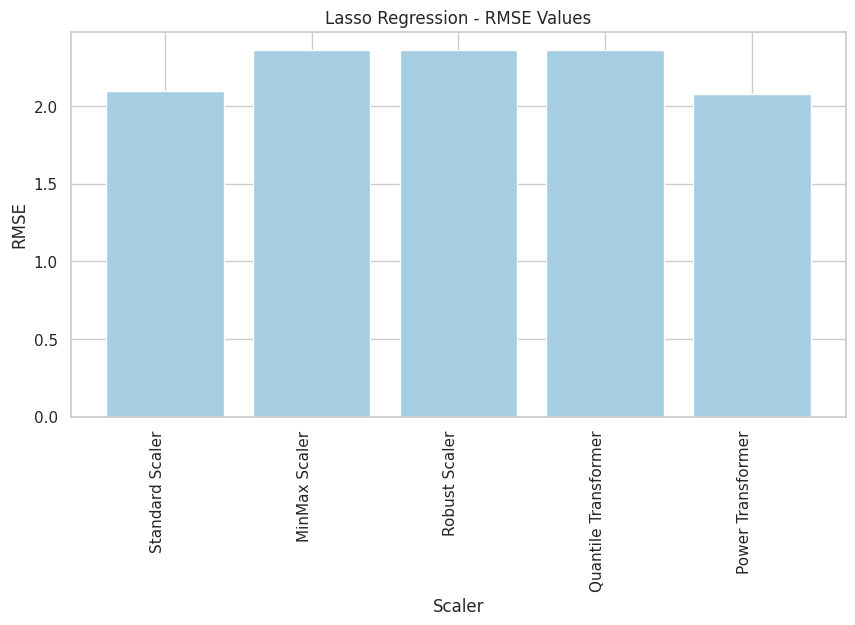

==================== Decision Tree Regression ====================
================================= R^2 =======================


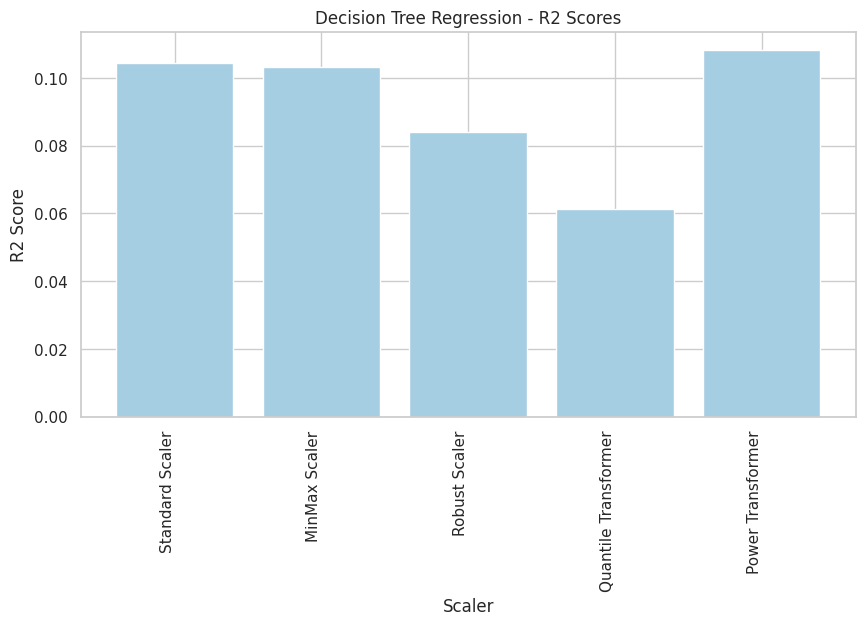

================================= MSE =======================


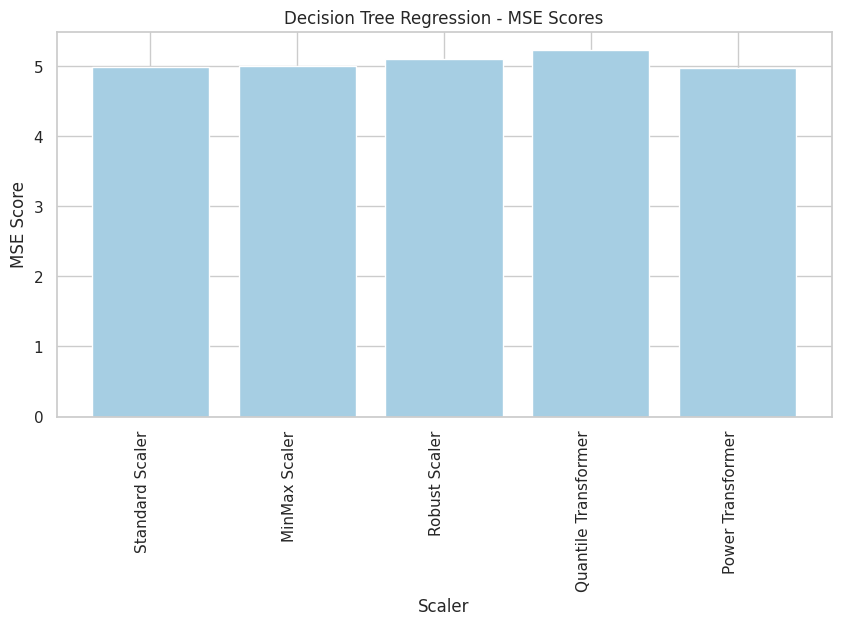

================================= RMSE =====================


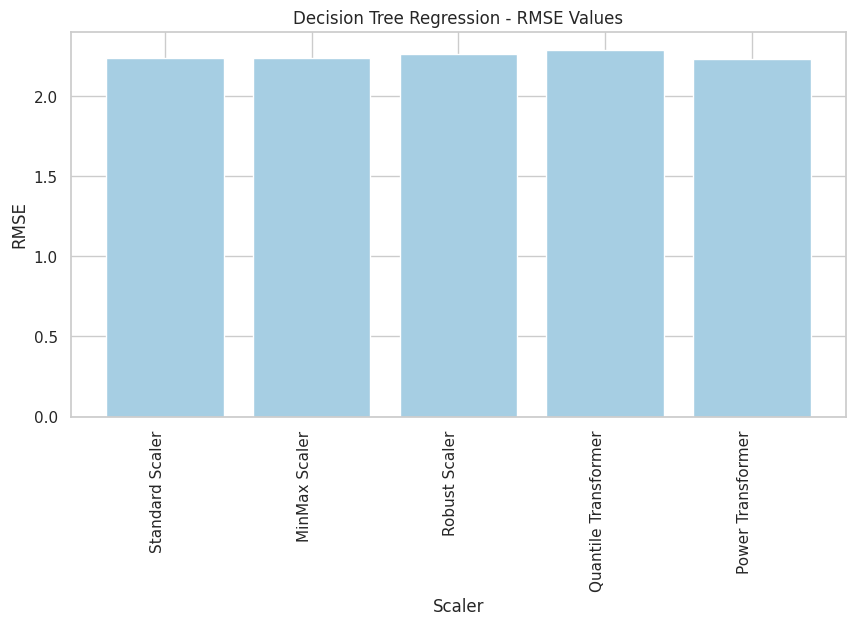

==================== Random Forest Regression ====================
================================= R^2 =======================


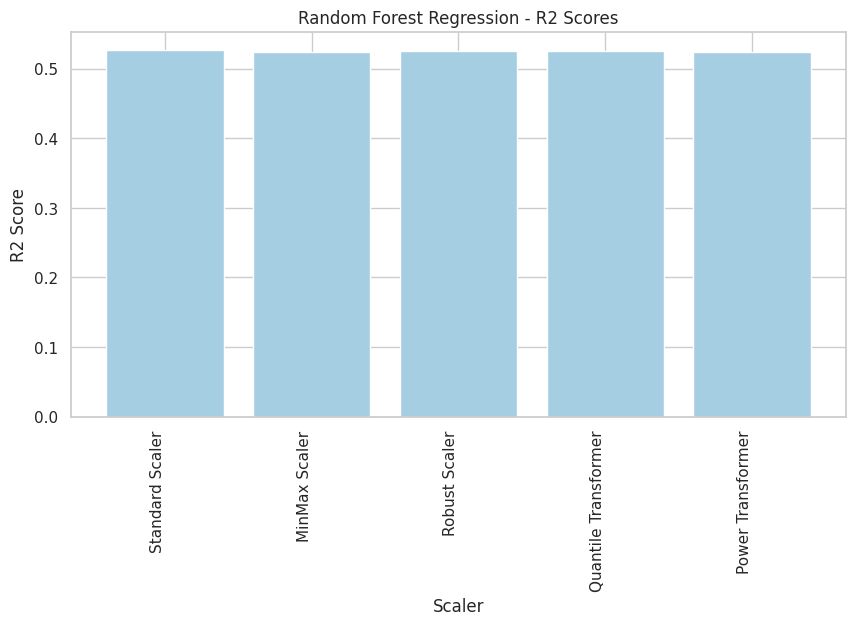

================================= MSE =======================


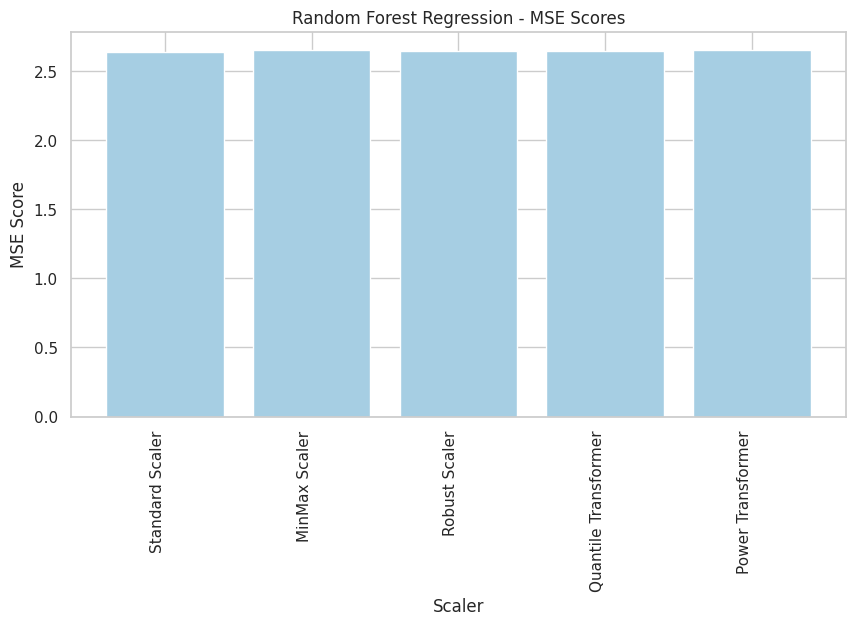

================================= RMSE =====================


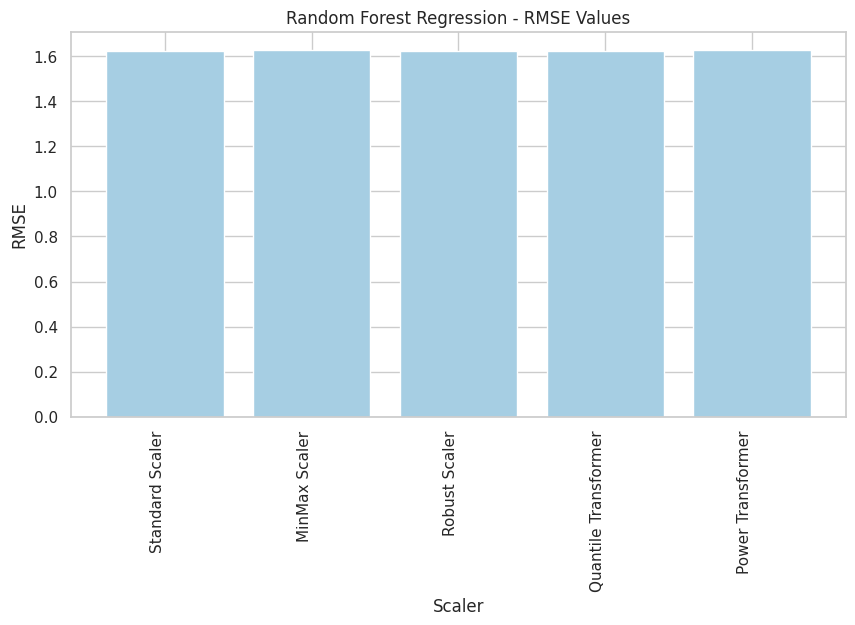

In [18]:
for regressor_name, regressor in regressors:
    df_regressor = results[results['Regressor'] == regressor_name]
    print(f"==================== {regressor_name} ====================")
    print("================================= R^2 =======================")
    plt.figure(figsize=(10, 5))
    plt.bar(df_regressor['Scaler'], df_regressor['R2'])
    plt.title(f'{regressor_name} - R2 Scores')
    plt.xlabel('Scaler')
    plt.ylabel('R2 Score')
    plt.xticks(rotation=90, ha='right')
    plt.show()
    
    print("================================= MSE =======================")
    plt.figure(figsize=(10, 5))
    plt.bar(df_regressor['Scaler'], df_regressor['MSE'])
    plt.title(f'{regressor_name} - MSE Scores')
    plt.xlabel('Scaler')
    plt.ylabel('MSE Score')
    plt.xticks(rotation=90, ha='right')
    plt.show()
    
    print("================================= RMSE =====================")
    plt.figure(figsize=(10, 5))
    plt.bar(df_regressor['Scaler'], df_regressor['RMSE'])
    plt.title(f'{regressor_name} - RMSE Values')
    plt.xlabel('Scaler')
    plt.ylabel('RMSE')
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [19]:
best_r2_row         = results.loc[results['R2'].idxmax()]
best_result_mse     = results.loc[results['R2'] == best_r2_row['R2']].loc[results['MSE'].idxmin()]
best_result_rmse    = results.loc[results['R2'] == best_result_mse['R2']].loc[results['RMSE'].idxmin()]
print("\nBest Result:")
print(best_result_rmse)


Best Result:
Regressor    Random Forest Regression
Scaler                Standard Scaler
R2                           0.526769
MSE                          2.634956
RMSE                         1.623255
Name: 20, dtype: object


In [20]:
model  = Pipeline([('scaler',PowerTransformer()),('regressor',RandomForestRegressor())]).fit(X_train,Y_train)